In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = True)

In [3]:
mnist_data = pd.concat([mnist['target'], mnist['data']], axis=1)
mnist_data.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
y = mnist_data['class'].astype(float)
X  = mnist_data.drop('class', axis = 1)
y = y[:60000]
X = X[:60000]
y = pd.get_dummies(y)


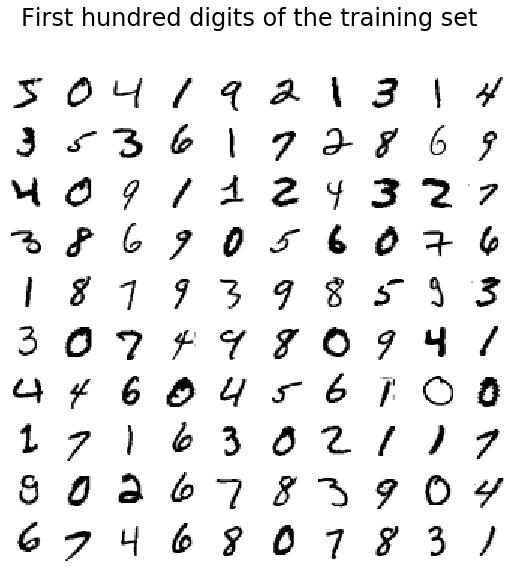

In [33]:
def plot_digit(image_data):
    image = np.array(image_data).reshape(28,28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

fig = plt.figure(figsize = (9,9))
for idx in range(100):
    plt.subplot(10,10, idx+1)
    some_digit = X.iloc[idx]
    plot_digit(some_digit)

fig.suptitle("First hundred digits of the training set", fontsize=24)
plt.show()

In [37]:
least_squares = np.linalg.pinv(X) @ y

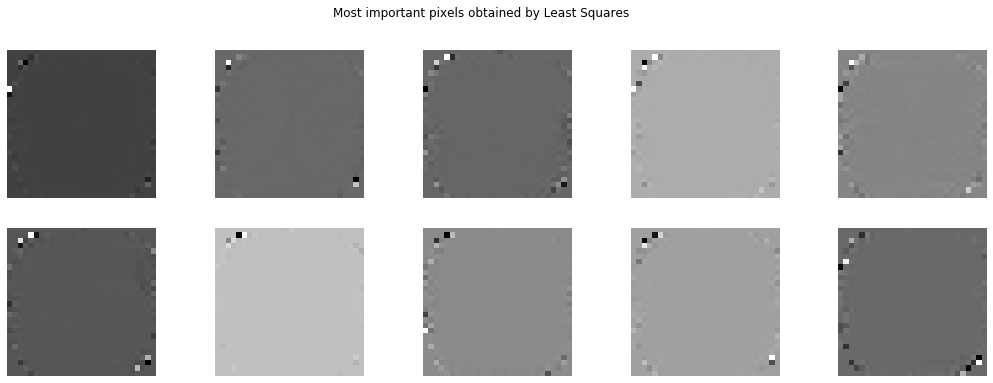

In [74]:
fig = plt.figure(figsize = (18,6))
fig.suptitle("Most important pixels obtained by Least Squares")
for idx in range(10):
    plt.subplot(2,5, idx+1)
    some_digit = least_squares[idx]
    plot_digit(some_digit)

In [52]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 1.0, fit_intercept=False).fit(X, y)
lasso = lasso_reg.coef_

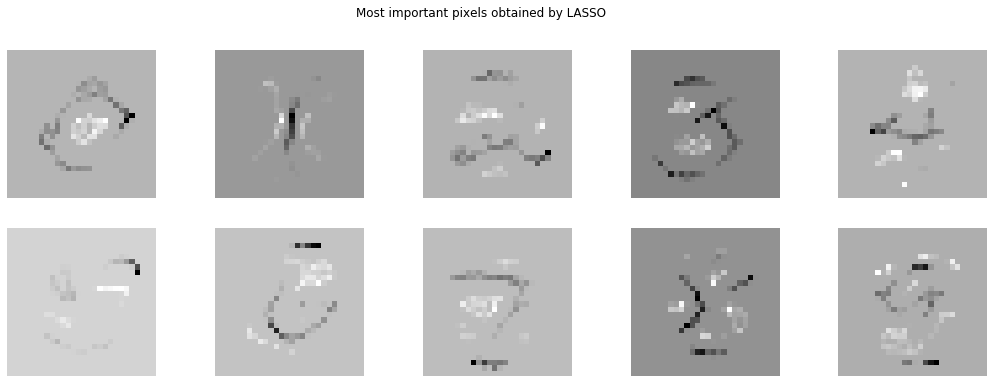

In [72]:
fig = plt.figure(figsize = (18,6))
fig.suptitle("Most important pixels obtained by LASSO")
for idx in range(10):
    plt.subplot(2,5, idx+1)
    some_digit = lasso[idx,:]
    plot_digit(some_digit)